In [1]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import scipy.stats as stats

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Function

In [3]:
def correlation():
    df1 = pd.DataFrame({'x':x1, 'y':y1})
    df2 = pd.DataFrame({'x':x2, 'y':y2})
    df3 = pd.DataFrame({'x':x3, 'y':y3})
    # print(df1.x.corr(df1.y))
    # print(df2.x.corr(df2.y))
    # print(df3.x.corr(df3.y))
    r1, p1=stats.pearsonr(df1.x,df1.y)
    r2, p2=stats.pearsonr(df2.x,df2.y)
    r3, p3=stats.pearsonr(df3.x,df3.y)
    a1.append(r1)
    a2.append(r2)
    a3.append(r3)
    b1.append(p1)
    b2.append(p2)
    b3.append(p3)

### 分段平均

In [8]:
def isplit_by_n(ls, n):
    for i in range(0, len(ls), n):
        yield ls[i:i+n]

def split_by_n(ls, n):
    return list(isplit_by_n(ls, n))

In [9]:
# dataset1 = pd.read_csv('4.1.1 EAC_trans_model/EAC_trans(1).csv')
dataset1 = pd.read_csv('4.1.1 EAC_trans_model/Tasman Front(1).csv')
# dataset2 = pd.read_csv('4.1.1 EAC_trans_model/sum of branches_trans(1).csv')
dataset2 = pd.read_csv('4.1.1 EAC_trans_model/eAC extension(1).csv')

j = 10

X1 = -dataset1.iloc[:, 1].values
X2 = -dataset1.iloc[:, 2].values
X3 = -dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

x1 = split_by_n(X1,j)
x1 = [sum(x)/len(x) for x in x1]
x2 = split_by_n(X2,j)
x2 = [sum(x)/len(x) for x in x2]
x3 = split_by_n(X3,j)
x3 = [sum(x)/len(x) for x in x3]
y1 = split_by_n(Y1,j)
y1 = [sum(x)/len(x) for x in y1]
y2 = split_by_n(Y2,j)
y2 = [sum(x)/len(x) for x in y2]
y3 = split_by_n(Y3,j)
y3 = [sum(x)/len(x) for x in y3]

x1 = x1[:-1]
x2 = x2[:-1]
x3 = x3[:-1]
y1 = y1[:-1]
y2 = y2[:-1]
y3 = y3[:-1]
        
a1 = []
a2 = []
a3 = []
b1 = []
b2 = []
b3 = []

correlation()



for i in range(1,21):

    X1 = -dataset1.iloc[:-i, 1].values
    X2 = -dataset1.iloc[:-i, 2].values
    X3 = -dataset1.iloc[:-i, 3].values
    Y1 = dataset2.iloc[i:, 1].values
    Y2 = dataset2.iloc[i:, 2].values
    Y3 = dataset2.iloc[i:, 3].values

    x1 = split_by_n(X1,j)
    x1 = [sum(x)/len(x) for x in x1]
    x2 = split_by_n(X2,j)
    x2 = [sum(x)/len(x) for x in x2]
    x3 = split_by_n(X3,j)
    x3 = [sum(x)/len(x) for x in x3]
    y1 = split_by_n(Y1,j)
    y1 = [sum(x)/len(x) for x in y1]
    y2 = split_by_n(Y2,j)
    y2 = [sum(x)/len(x) for x in y2]
    y3 = split_by_n(Y3,j)
    y3 = [sum(x)/len(x) for x in y3]
    
    if i != 3:
        x1 = x1[:-1]
        x2 = x2[:-1]
        x3 = x3[:-1]
        y1 = y1[:-1]
        y2 = y2[:-1]
        y3 = y3[:-1]

    correlation()
        
        
test1 = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

test1.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test1)

round(test1,2).to_csv('6.2.41 correlation and lags/correlation and lags(' + str(j) + ').csv')



test2 = pd.DataFrame({'1deg':b1,'025deg':b2,'01deg':b3})

test2.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test2)

round(test2,2).to_csv('6.2.41 p value and lags/p value and lags(' + str(j) + ').csv')

        1deg    025deg     01deg
0  -0.872920 -0.562273 -0.288966
1  -0.881105 -0.567450 -0.235757
2  -0.885678 -0.572638 -0.256104
3  -0.882355 -0.580459 -0.316886
4  -0.874352 -0.620486 -0.389759
5  -0.868785 -0.634995 -0.431463
6  -0.869184 -0.618061 -0.456631
7  -0.875129 -0.590312 -0.488537
8  -0.874409 -0.598500 -0.464081
9  -0.856460 -0.630557 -0.406579
10 -0.815681 -0.588147 -0.405723
11 -0.786511 -0.589509 -0.452934
12 -0.760638 -0.569420 -0.465878
13 -0.749929 -0.542345 -0.448378
14 -0.716755 -0.534629 -0.490547
15 -0.686426 -0.508261 -0.543128
16 -0.661986 -0.511142 -0.486975
17 -0.654191 -0.517737 -0.534788
18 -0.623615 -0.473090 -0.498578
19 -0.576787 -0.394462 -0.518630
20 -0.527967 -0.366520 -0.531626
        1deg    025deg     01deg
0   0.000002  0.015147  0.244836
1   0.000001  0.014042  0.346298
2   0.000001  0.013001  0.304991
3   0.000001  0.011548  0.200108
4   0.000004  0.007869  0.121979
5   0.000006  0.006168  0.083758
6   0.000006  0.008187  0.065396
7   0.0000

### 连续平均

In [6]:
# dataset1 = pd.read_csv('4.1.1 EAC_trans_model/EAC_trans(1).csv')
dataset1 = pd.read_csv('4.1.1 EAC_trans_model/Tasman Front(1).csv')
# dataset2 = pd.read_csv('4.1.1 EAC_trans_model/sum of branches_trans(1).csv')
dataset2 = pd.read_csv('4.1.1 EAC_trans_model/eAC extension(1).csv')
for j in range (1,11):
    
    X1 = -dataset1.iloc[:, 1].values
    X2 = -dataset1.iloc[:, 2].values
    X3 = -dataset1.iloc[:, 3].values
    Y1 = dataset2.iloc[:, 1].values
    Y2 = dataset2.iloc[:, 2].values
    Y3 = dataset2.iloc[:, 3].values

    
    w = j
    
    x1 = np.convolve(X1, np.ones(w), 'valid') / w
    x2 = np.convolve(X2, np.ones(w), 'valid') / w
    x3 = np.convolve(X3, np.ones(w), 'valid') / w
    y1 = np.convolve(Y1, np.ones(w), 'valid') / w
    y2 = np.convolve(Y2, np.ones(w), 'valid') / w
    y3 = np.convolve(Y3, np.ones(w), 'valid') / w

    a1 = []
    a2 = []
    a3 = []
    b1 = []
    b2 = []
    b3 = []


    correlation()
    
    for i in range(1,21):

        X1 = -dataset1.iloc[:-i, 1].values
        X2 = -dataset1.iloc[:-i, 2].values
        X3 = -dataset1.iloc[:-i, 3].values
        Y1 = dataset2.iloc[i:, 1].values
        Y2 = dataset2.iloc[i:, 2].values
        Y3 = dataset2.iloc[i:, 3].values

        x1 = np.convolve(X1, np.ones(w), 'valid') / w
        x2 = np.convolve(X2, np.ones(w), 'valid') / w
        x3 = np.convolve(X3, np.ones(w), 'valid') / w
        y1 = np.convolve(Y1, np.ones(w), 'valid') / w
        y2 = np.convolve(Y2, np.ones(w), 'valid') / w
        y3 = np.convolve(Y3, np.ones(w), 'valid') / w

        correlation()


        
    test = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)
    
    round(test,2).to_csv('6.2.4 correlation and lags/correlation and lags(' + str(j) + ').csv')
    
    
    test = pd.DataFrame({'1deg':b1,'025deg':b2,'01deg':b3})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)
    
    round(test,2).to_csv('6.2.4 p value and lags/p value and lags(' + str(j) + ').csv')

        1deg    025deg     01deg
0  -0.727514 -0.292460 -0.013308
1  -0.771845 -0.381609  0.001739
2  -0.790535 -0.411621 -0.139809
3  -0.753184 -0.358522 -0.094930
4  -0.701502 -0.248025 -0.217407
5  -0.664403 -0.249741 -0.027299
6  -0.654915 -0.286656  0.020860
7  -0.611595 -0.207853 -0.118516
8  -0.589250 -0.264686 -0.020486
9  -0.552852 -0.200340 -0.157016
10 -0.528455 -0.155588 -0.104319
11 -0.542397 -0.173738 -0.164405
12 -0.542169 -0.201433 -0.115904
13 -0.564228 -0.338046 -0.210498
14 -0.564977 -0.333302 -0.073842
15 -0.569278 -0.285903 -0.042866
16 -0.548154 -0.285037 -0.112211
17 -0.498295 -0.178226 -0.072975
18 -0.471349 -0.140502 -0.086243
19 -0.453670 -0.258258 -0.074995
20 -0.384093 -0.215202 -0.088856
            1deg        025deg     01deg
0   1.967174e-31  5.884036e-05  0.858094
1   3.044885e-37  1.065141e-07  0.981415
2   5.715591e-40  8.578734e-09  0.060500
3   3.305826e-34  7.738565e-07  0.204938
4   7.760090e-28  8.152723e-04  0.003463
5   4.963992e-24  7.740399e-

### Plot

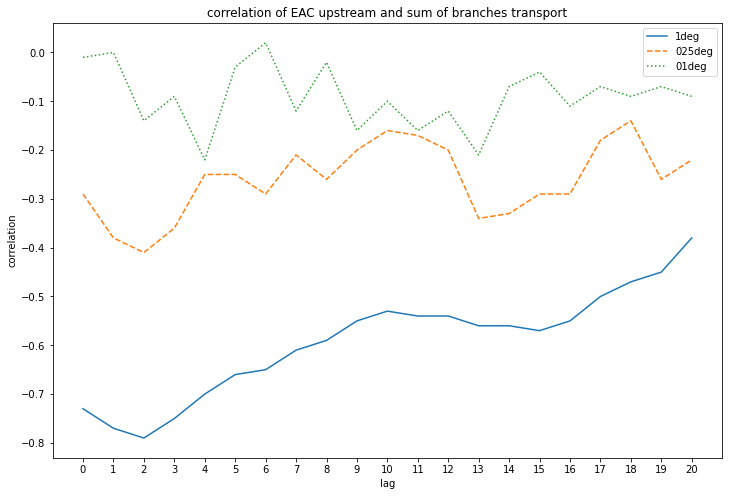

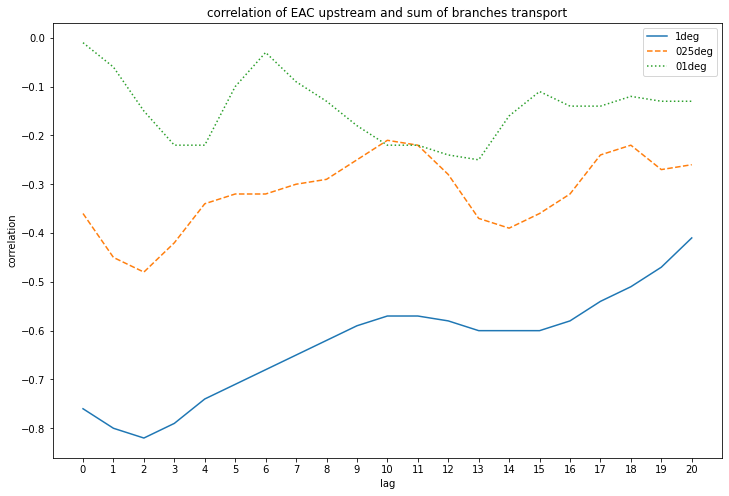

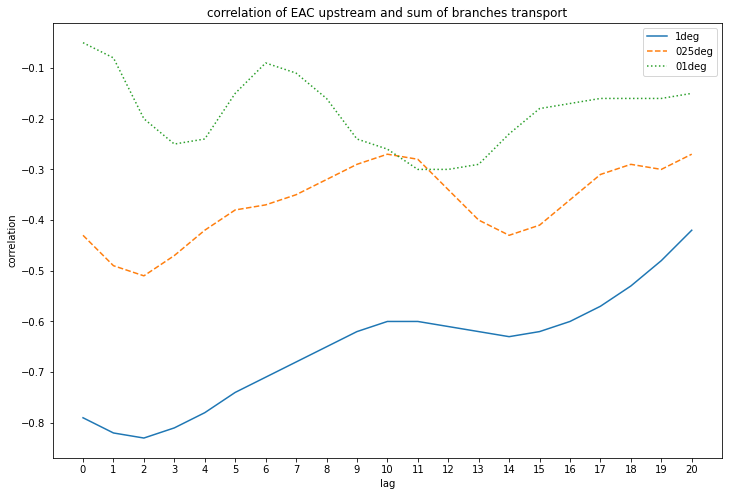

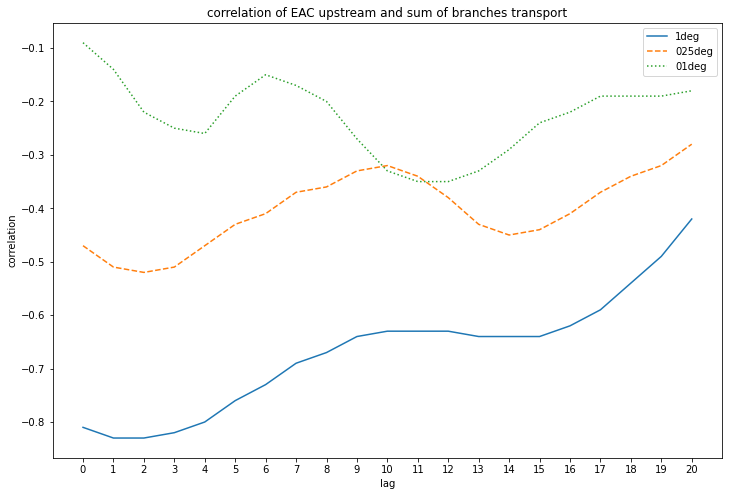

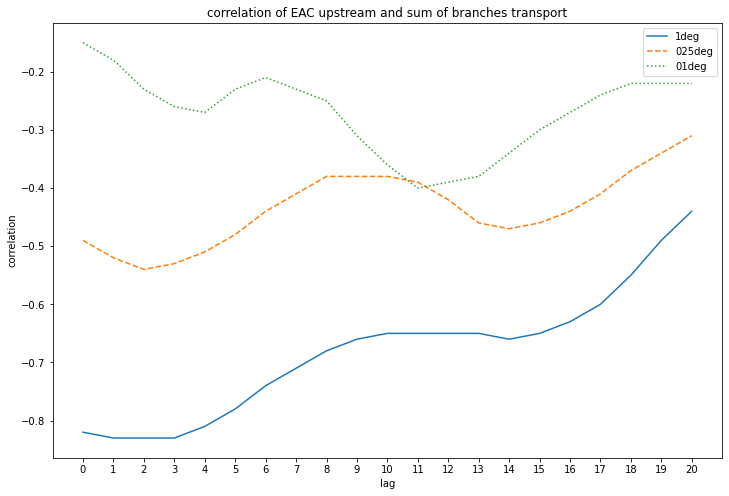

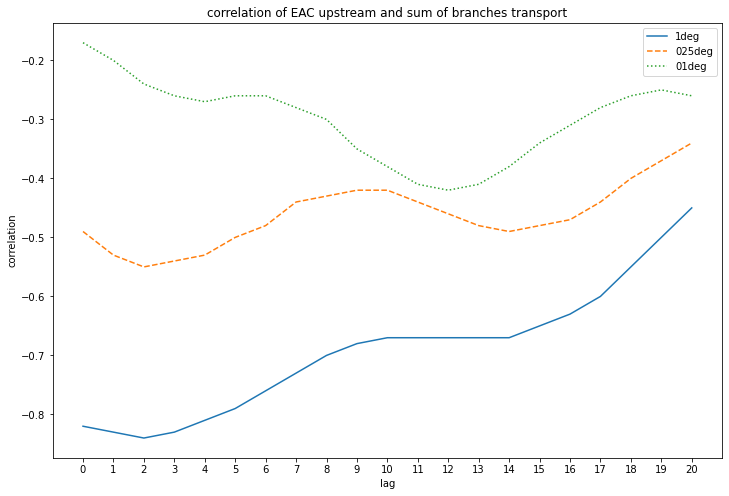

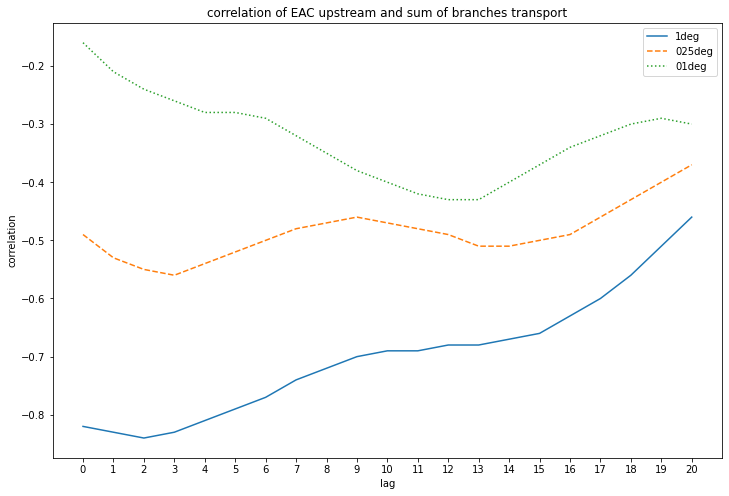

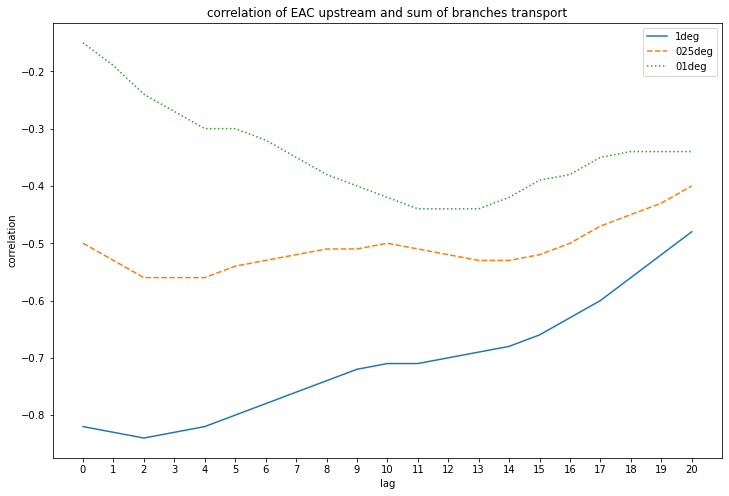

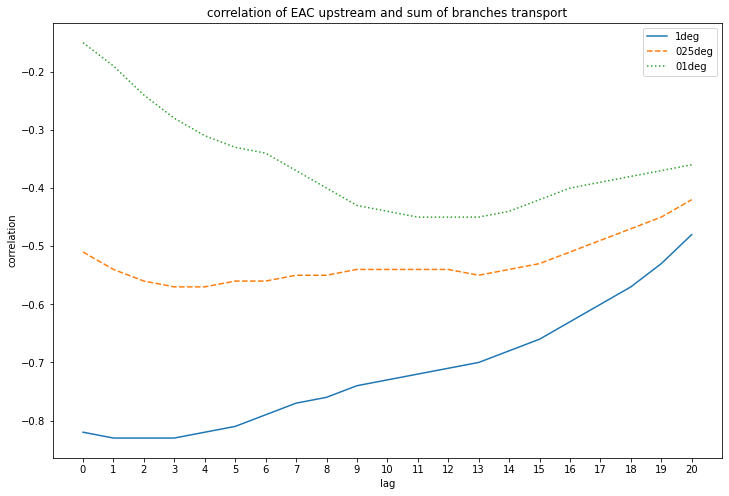

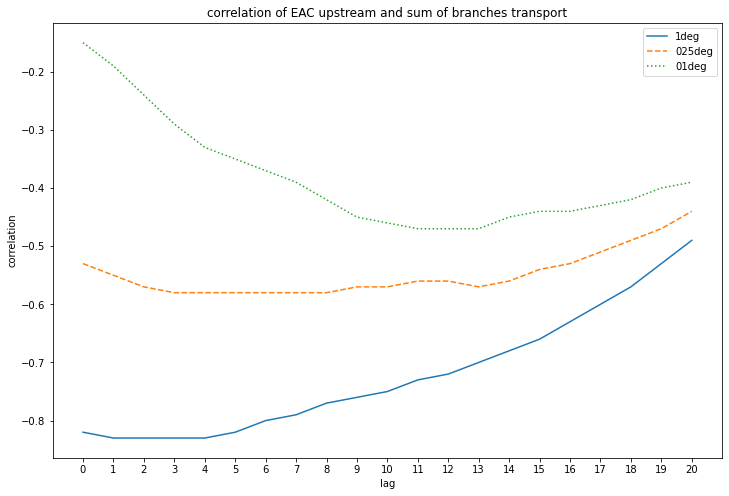

In [7]:
for j in range (1,11):
    
    x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    dataset = pd.read_csv('6.2.4 correlation and lags/correlation and lags(' + str(j) + ').csv')
    
    y1 = dataset.iloc[:, 1].values
    y2 = dataset.iloc[:, 2].values
    y3 = dataset.iloc[:, 3].values

    plt.figure(figsize(12,8))

    plt.plot(x,y1, label = '1deg')
    plt.plot(x,y2, label = '025deg',linestyle = '--')
    plt.plot(x,y3, label = '01deg',linestyle = ':')

    # plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
    plt.legend(loc=1)                        
    plt.xticks(x)
    plt.title('correlation of EAC upstream and sum of branches transport')
    # plt.title('correlation of EAC upstream and EAC extension transport')
    plt.xlabel('lag')
    plt.ylabel('correlation')

    savefigure('correlation and lag of ' + str(j) + '-year averaged') 